#### CSC 180 Intelligent Systems 

#### Dr. Haiquan Chen, Dept of Computer Scicence

#### California State University, Sacramento


## Lab 9: TensorFlow Functional API

### I recommend you running this lab in Google Colab

Sequential model API only allows you to define **models with one input and one output**. However, using Funstional API, you can define the following models:

* models with multiple inputs 

* model with multiple outputs

* models that re-use layers.

#### First we should install the following libraries for model plotting:

* conda install pydot
* conda install pydotplus
* conda install python-graphviz



## 1. Functional API Overview

https://www.tensorflow.org/guide/keras/functional


### 1. Defining Input layer

Unlike the Sequential model, you must ***create and define a standalone Input layer*** that specifies the shape of input data.

* The input layer takes a shape argument that is a tuple that indicates the dimensionality of the input data.

***When input data is one-dimensional,*** the shape must explicitly leave room for the shape of the mini-batch size used when splitting the data when training the network. Therefore, the shape tuple is always defined with a hanging last dimension when the input is one-dimensional (2,), for example:

In [1]:
from tensorflow.keras.layers import Input

# Shape must take a tuple not a scalar 
# 1D
visible = Input(shape=(2,))

### 2. Connecting all layers using "bracket notation"

#### The layers are connected pairwise using "bracket notation".

This is done by specifying where the input comes from when defining each new layer. A bracket notation is used, such that after the layer is created, the layer from which the input to the current layer comes from is specified.

Let’s make this clear with a short example. ***We can create the input layer as above, then create a hidden layer as a Dense that receives input only from the input layer.***

In [2]:
from tensorflow.keras.layers import Dense

hidden = Dense(2)(visible)

It is this way of connecting layers piece by piece that gives the functional API its flexibility. For example, you can see how easy it would be to start defining ad hoc graphs of layers.

### 3. After creating all of your model layers and connecting them together, you must define the model.

As with the Sequential API, the model is the thing you can summarize, fit, evaluate, and use to make predictions.

Keras provides a ***Model class that you can use to create a model*** from your created layers. 

***You need to only specify the input and output layers of your model.*** For example:

In [3]:
from tensorflow.keras.models import Model


visible = Input(shape=(2,))

hidden = Dense(2)(visible)

model = Model(inputs=visible, outputs=hidden)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## 2. Standard Network Models
When getting started with the functional API, it is a good idea to see how some standard neural network models are defined.


### 1. Multilayer Model


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


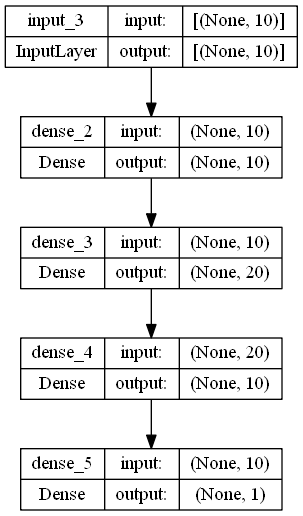

In [5]:
# Multilayer Perceptron


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import plot_model

visible = Input(shape=(10,))

hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, show_shapes=True)


### 2. Convolutional Neural Network

In this section, we will define a convolutional neural network for image classification.

#### The model receives ***black and white 64×64 images as input***, then has a sequence of two convolutional and pooling layers as feature extractors, followed by a fully connected layer to interpret the features and an output layer with a sigmoid activation for two-class predictions.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        8208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2704)              0   

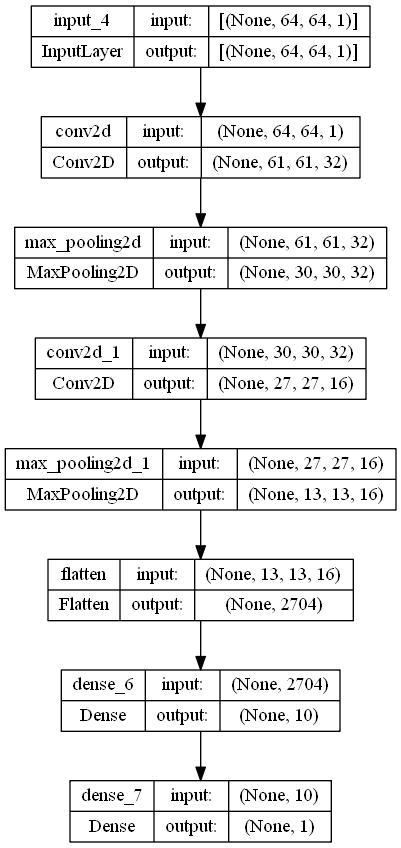

In [6]:
# Convolutional Neural Network
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


visible = Input(shape=(64,64,1))

conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)

hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, show_shapes=True)

### 3. Recurrent Neural Network
In this section, we will define a long short-term memory recurrent neural network for sequence classification.

***The model expects 100 time steps of three feature as input***. The model has a single LSTM hidden layer to extract features from the sequence, followed by a fully connected layer to interpret the LSTM output, followed by an output layer for making binary predictions

In [1]:
# If numpy 1.20 gives you error, you may want to downgrade using pip install numpy==1.19.2
# Recurrent Neural Network
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

visible = Input(shape=(100,3))

hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model,  show_shapes=True)


2024-10-06 19:19:17.711010: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 3)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                560       
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2024-10-06 19:19:31.029281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-10-06 19:19:31.032251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-10-06 19:19:31.034490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

## 3. Model with multiple layers reusing one layer.


For example, ***there may be multiple different feature extraction layers from an input***, or multiple layers used to interpret the output from a feature extraction layer.


In this section, we define multiple convolutional layers with differently sized kernels to interpret an image input.

* The model ***takes black and white images with the size 64×64 pixels.***  

* There are ***two CNN feature extraction submodels that share this input;***  The first has a kernel size of 4 and the second a kernel size of 8. 

* The outputs from these feature extraction submodels are ***concatenated into one long vector*** and passed on to a fully connected layer before a final output layer makes a binary classification.

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 61, 61, 32)   544         ['input_6[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 57, 57, 16)   1040        ['input_6[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 30, 30, 32)  0           ['conv2d_2[0][0]']               
                                                                                            

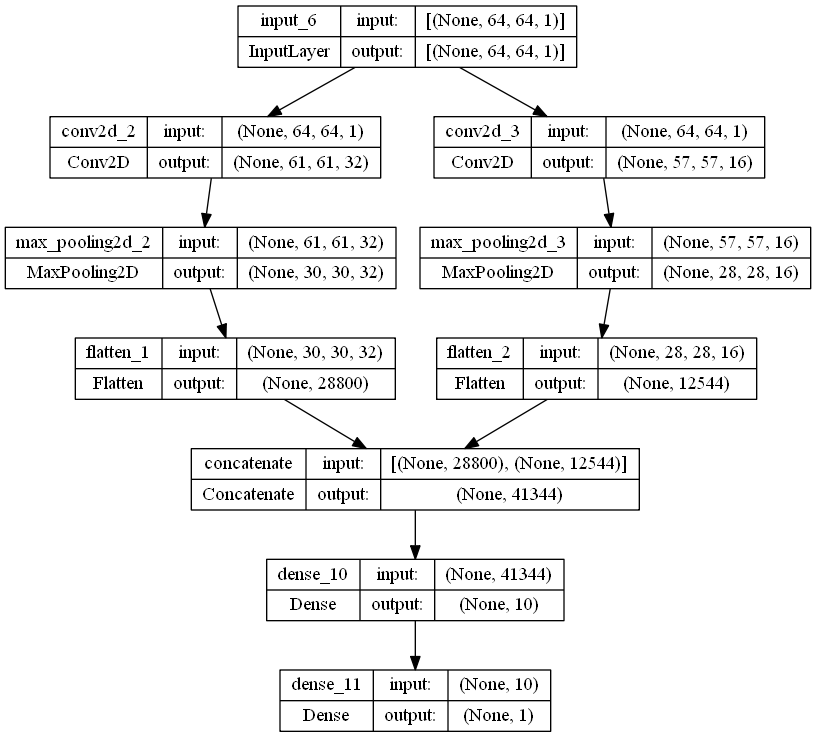

In [8]:
# Shared Input Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate

# input layer
visible = Input(shape=(64,64,1))

# first feature extractor
conv1 = Conv2D(32, kernel_size=(4,4), activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# second feature extractor
conv2 = Conv2D(16, kernel_size=(8,8), activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)


# merge feature extractors
merge = concatenate([flat1, flat2])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(hidden1)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, show_shapes=True)

#Image(filename='plots/shared_input_layer.png') 

## 3. Models with multiple inputs and outputs

#### 1. Multiple Input Model:  

We will develop ***an image classification model that takes two versions of the image as input***, each of a different size. 

* Specifically ***a black and white 64×64 version and a color 32×32 version***. ***Separate feature extraction CNN models operate on each***, then ***the results from both models are concatenated*** for interpretation and ultimate prediction.

* Note that in the creation of the Model() instance, that we define the two input layers as an array. Specifically:

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 61, 61, 32)   544         ['input_7[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 29, 29, 32)   1568        ['input_8[0][0]']                
                                                                                            

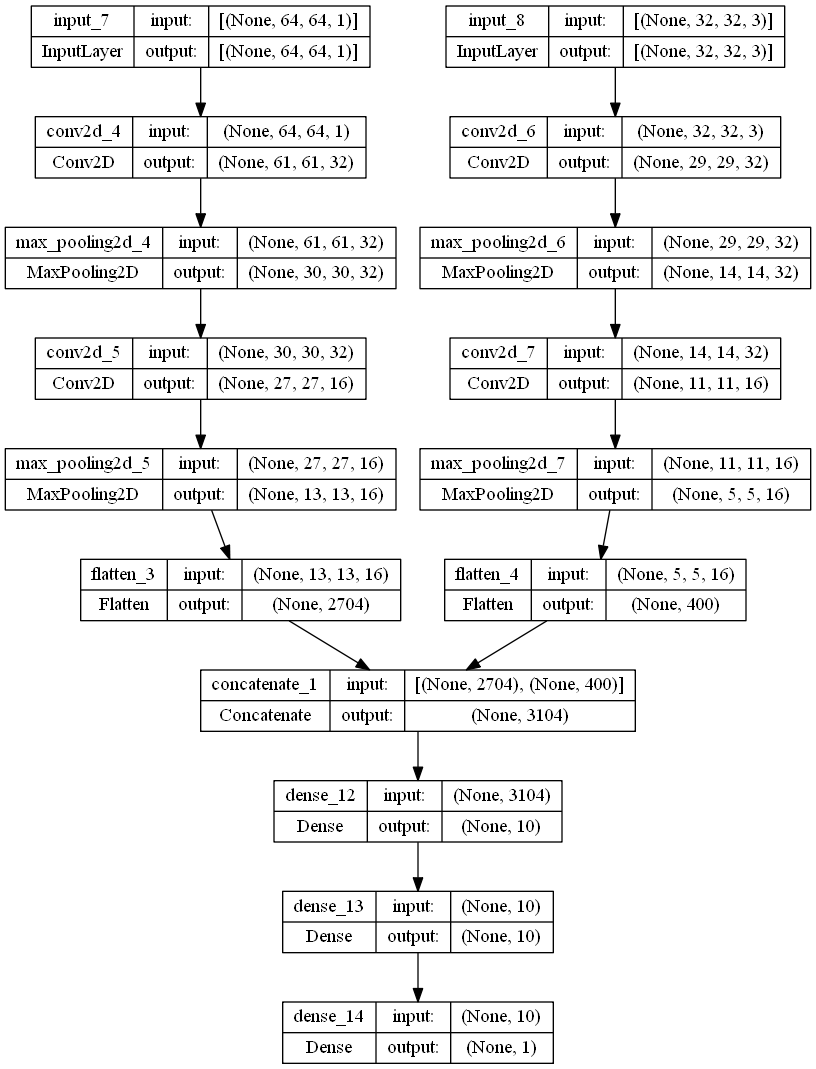

In [9]:
# Multiple Inputs
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate

# first input model
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)


# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])


# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)


model = Model(inputs=[visible1, visible2], outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, show_shapes=True)

### 2. Multiple Output Model
In this section, we will ***develop a model that makes two different types of predictions***. 



![m_i](https://fm-static.cnbc.com/awsmedia/chart/2018/8/14/AMZN_chart%20(1).1536940221501.jpeg?)



* Given an input sequence of 100 time steps of three features, the model will both classify the sequence and output a new sequence with the same length.

* The first output model creates a stacked LSTM, interprets the features, and makes a binary prediction. The second output model uses the same output layer to make a real-valued prediction for each input time step.

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 100, 3)]     0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (None, 100, 10)      560         ['input_9[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, 10)           840         ['lstm_1[0][0]']                 
                                                                                                  
 dense_15 (Dense)               (None, 10)           110         ['lstm_2[0][0]']                 
                                                                                            

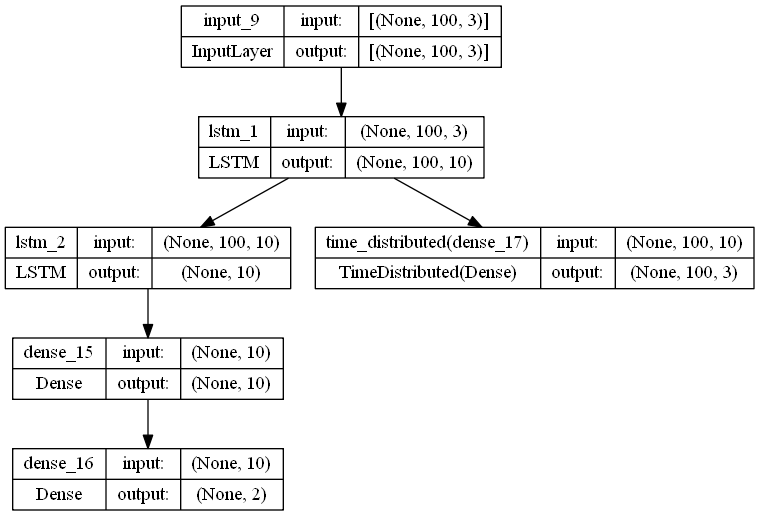

In [10]:
# Multiple Outputs

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed


# input layer
visible = Input(shape=(100,3))

# feature extraction for 100 time steps
extract = LSTM(10, return_sequences=True)(visible)

# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(2, activation='softmax')(class12)

# sequence output for 100 time steps
output2 = TimeDistributed(Dense(3, activation='linear'))(extract)

# output
model = Model(inputs=visible, outputs=[output1, output2])

# summarize layers
print(model.summary())
# plot graph
plot_model(model, show_shapes=True)

## More complex models:

### 1. Visual question answering model

How to build a model that ***outputs a one-word answer when asked a natural-language question about a picture?***

It works by encoding the question into a vector, encoding the image into a vector, concatenating the two, and send that data to dense layers.

![exa1](https://www.petmd.com/sites/default/files/introduce-dog-to-cat.jpg)


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 256)     2560000     ['input_13[0][0]']               
                                                                                                  
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 lstm_4 (LSTM)                  (None, 256)          525312      ['embedding_1[0][0]']      

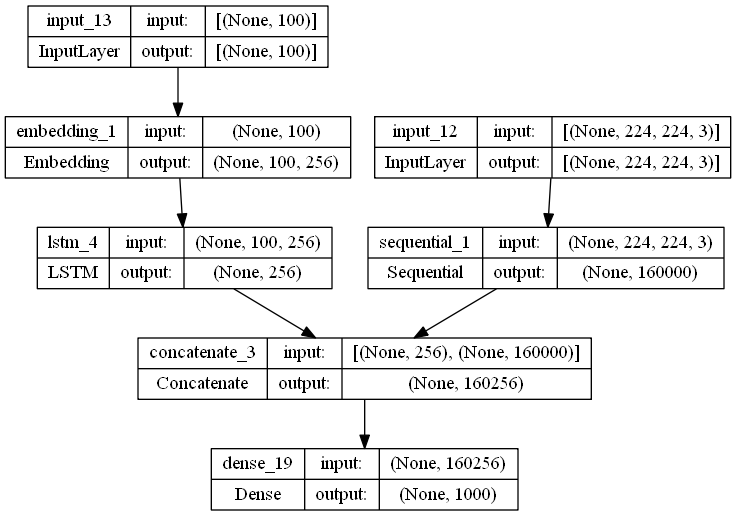

In [12]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import concatenate

# First, let's define a vision model using a Sequential model.
# This model will encode an image into a vector.

vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Flatten())

# Now let's get a tensor with the output of our vision model:
image_input = Input(shape=(224, 224, 3))

encoded_image = vision_model(image_input)

# Next, let's define a language model to encode the question into a vector.
# Each question will be at most 100 word long,
# and we will index words as integers from 1 to 9999.

question_input = Input(shape=(100,), dtype='int32')

# Next we use Embedding to turns integers (indexes) into dense vectors of fixed size. 
# You may think about Embedding layer as one hot encoding followed by a dense layer
# input_dim = vocabulary size
# input_length: Length of input sequences,
    
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Let's concatenate the question vector and the image vector:
merged = concatenate([encoded_question, encoded_image])

# And let's train a logistic regression over 1000 words on top:
output = Dense(1000, activation='softmax')(merged)

# This is our final model:
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# summarize layers
print(vqa_model.summary())

# plot graph
plot_model(vqa_model, show_shapes=True)

### 2. Video question answering model


***Now that we have trained our image QA model, we can quickly turn it into a video QA model.***  With appropriate training, you will be able to show it a short video (e.g. 100-frame human action) and ask a natural language question about the video (e.g. "what sport is the boy playing?" -> "soccer").

![exa2](http://www.animatedimages.org/data/media/165/animated-football-and-soccer-image-0093.gif)


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 100, 224, 2  0           []                               
                                24, 3)]                                                           
                                                                                                  
 input_15 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 time_distributed_1 (TimeDistri  (None, 100, 160000)  1735488    ['input_14[0][0]']               
 buted)                                                                                           
                                                                                            

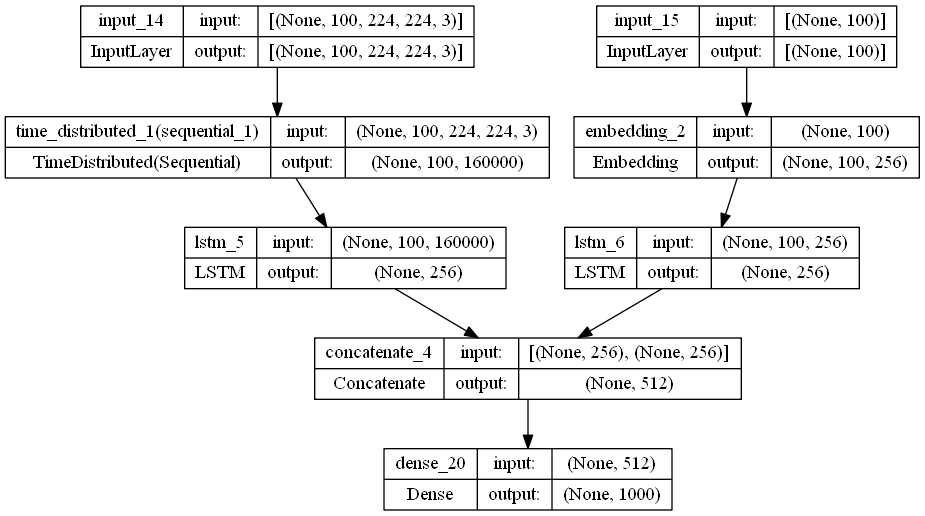

In [13]:
from tensorflow.keras.layers import TimeDistributed

video_input = Input(shape=(100, 224, 224, 3))

# This is our video encoded via the previously trained vision_model (weights are reused)
encoded_frame_sequence = TimeDistributed(vision_model)(video_input)  # the output will be a sequence of vectors
encoded_video = LSTM(256)(encoded_frame_sequence)  # the output will be a vector



question_input = Input(shape=(100,), dtype='int32')

# Next we use Embedding to turns integers (indexes) into dense vectors of fixed size. 
# You may think about Embedding layer as one hot encoding followed by a dense layer
# input_dim = vocabulary size
# input_length: Length of input sequences,
    
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)



# And this is our video question answering model:
merged = concatenate([encoded_video, encoded_question])
output = Dense(1000, activation='softmax')(merged)

video_qa_model = Model(inputs=[video_input, question_input], outputs=output)

# summarize layers
print(video_qa_model.summary())

# plot graph
plot_model(video_qa_model, show_shapes=True)

#### Super Super Cool, right?